A company has been testing out different ad configurations on YouTube videos. They have tried modifying the position of the ad within the video, the length of the ad, the location of the call-to-action button linking to their website, the color of the ad background, the background music, and the category of video the ad is placed on.

They have compiled a collection of various experiments with the corresponding number of conversions, or visits to their website resulting from each ad, in the 'youtube_ad_data.csv' file.


For the following questions, write out the appropriate hypothesis test, calculate the test statistic and signficance, report the power and effect size of the test, run an ad-hoc test if applicable, and write a summary of the results.

In [75]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.power import tt_ind_solve_power


In [2]:
def cohens_d_one_samp(x, mu0):
    return (x.mean() - mu0) / x.std()


def cohens_d_two_samp(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

In [3]:
df = pd.read_csv('youtube_ad_data.csv')

In [4]:
df.head()

,Conversion,Video_Location,Duration,Button_Location,Background_Color,Video_Type,Background_Music
0,183,beginning,short,lower-right,black,beauty,none
1,67,end,long,lower-left,green,beauty,classical
2,154,beginning,medium,middle,red,news,none
3,168,middle,short,upper-left,black,gaming,none
4,188,middle,short,upper-left,orange,beauty,hip hop


## 1) Do ads placed on gaming videos lead to higher conversion on average?

## Hypothesis test

H0 = Ads on gaming videos have no significant effect on Coversion

H1 = Ads on gaming videos have a significant effect on Coversion

## Sampling

In [5]:
not_gaming = df[df.Video_Type != 'gaming']
N = not_gaming.Conversion
sample_N = N.sample(n=1000, random_state=22,replace=True) #Take a sample of 50 people
print('Sample Not_Gaming:',stats.describe(sample_N),'\n')

Gaming = df[df.Video_Type=='gaming']
G = Gaming.Conversion
sample_G = G.sample(n=1000, random_state=22,replace=True) #Take a sample of 50 people
print('Sample Gaming:',stats.describe(sample_G),'\n')


Sample Not_Gaming: DescribeResult(nobs=1000, minmax=(42, 351), mean=163.499, variance=5581.755754754755, skewness=0.5513318194109296, kurtosis=-0.35769066078075573) 

Sample Gaming: DescribeResult(nobs=1000, minmax=(63, 339), mean=166.095, variance=4089.1511261261257, skewness=0.8216590907374709, kurtosis=0.5637208565432377) 



## Visualizing Sample Distribution

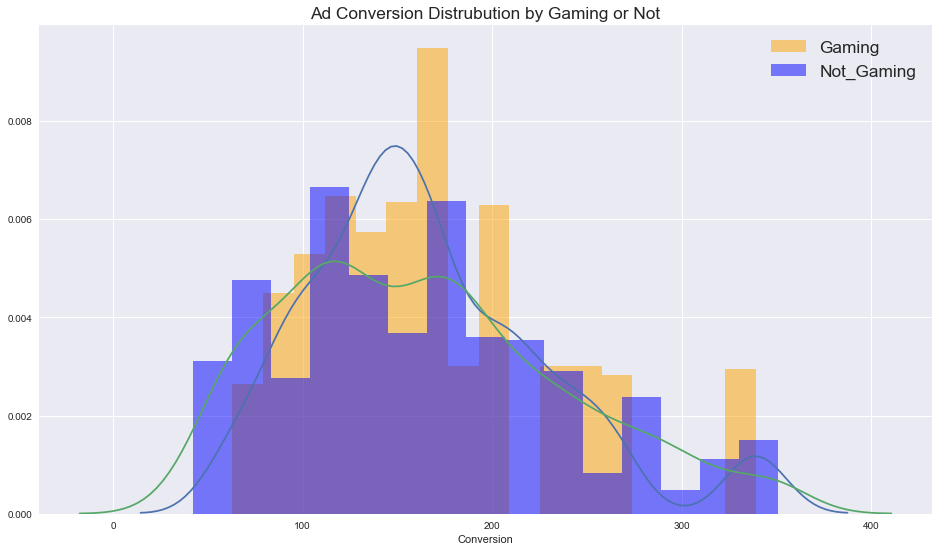

In [6]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 9))
sns.distplot(sample_G, hist_kws={ 'color':'orange', 'alpha':0.5, 'label':'Gaming'})
sns.distplot(sample_N, hist_kws={ 'color':'blue', 'alpha':0.5, 'label':'Not_Gaming'})
plt.legend(fontsize='xx-large')
plt.title('Ad Conversion Distrubution by Gaming or Not', fontdict={'fontsize': 'xx-large'})
plt.show()



##  Analysis

Since we have have one sample, and do not know the population variance, we will use a One-sample Ttest. We will make the assumption that all videos that are not of type 'gaming' have the same conversion rate as stated in the null hypothesis. We will define the average conversion of these types and assume it to be the same as the population mean.

In [7]:
mu0 = not_gaming.mean()
mu0

Conversion    161.658228
dtype: float64

* The assumed mean conversion is roughly 161.66

In [8]:
stats.ttest_1samp(sample_G,mu0)

Ttest_1sampResult(statistic=Conversion    2.19407
dtype: float64, pvalue=array([0.02846005]))

* The p_value is .02 and shows a statistical influence on the assumed population mean. We cannot reject the null hypothesis without further investigation into the effect size

In [9]:
cohens_d_one_samp(sample_G,mu0)

Conversion    0.069383
dtype: float64

* This effect size has a medium to large effect on the mean conversion

In [48]:
effect_size1 = cohens_d_one_samp(sample_G, mu0)
effect_size1, nobs1, alpha = effect_size1, sample_G.shape[0], 0.05
tt_ind_solve_power(effect_size=effect_size1, nobs1=nobs1, alpha=0.05)


Conversion    0.341395
dtype: float64

* This shows our beta, or power, at almost 34%.

## Summary

- Hypothesis Test
    * We have significant evidence to reject the null hypothesis
    * This means that the means between gaming videos types and other types are different
- Effect Size
    * The effect size ~ 0.7 which means that there is a large effect on the mean ad conversion of gaming videos . 
- Power Analysis
    * After a power analysis, we're almost 34% certain that we will fail to reject  our null hypothesis when we need to.

# 2) Is the conversion rate different for ads that are very short versus ads that are long?


## Hypothesis test

H0 = AD conversion rate for short videos is the same as long videos

H1 = AD conversion rate for short videos are different than a long videos

## Sampling

In [12]:
Short = df[df.Duration=='short']
S = Short.Conversion
sample_S = S.sample(n=1000, random_state=22,replace=True) #Take a sample of 50 people
print('Sample Short:',stats.describe(sample_S),'\n')

Long = df[df.Duration=='long']
L = Long.Conversion
sample_L = L.sample(n=1000, random_state=22,replace=True) #Take a sample of 50 people
print('Sample Long:',stats.describe(sample_L),'\n')

Sample Short: DescribeResult(nobs=1000, minmax=(55, 339), mean=166.663, variance=4222.4378688688685, skewness=0.42669359166726556, kurtosis=0.5568959625716148) 

Sample Long: DescribeResult(nobs=1000, minmax=(61, 351), mean=153.138, variance=5453.02397997998, skewness=0.9090378312957955, kurtosis=0.07873989336467968) 



## Visualizing Sample Distribution

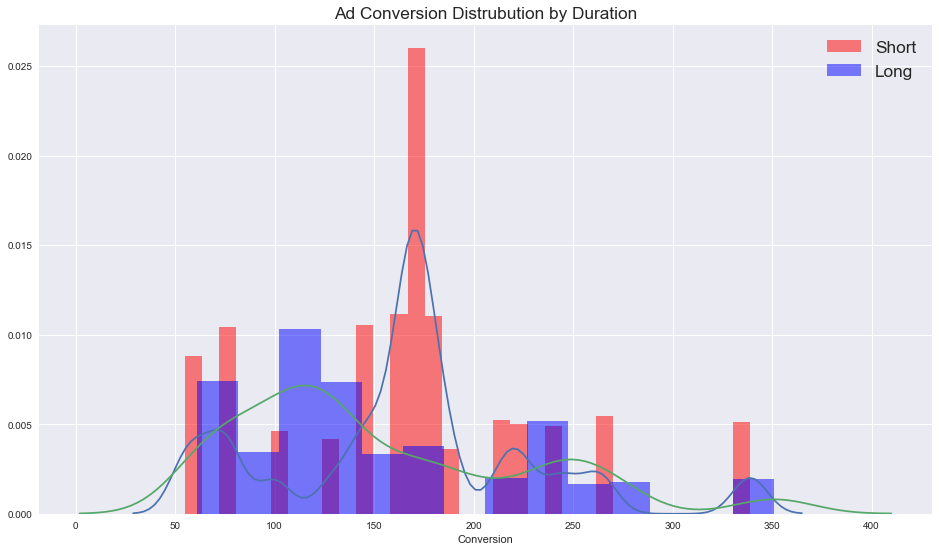

In [13]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 9))
sns.distplot(sample_S, hist_kws={ 'color':'red', 'alpha':0.5, 'label':'Short'})
sns.distplot(sample_L, hist_kws={ 'color':'blue', 'alpha':0.5, 'label':'Long'})
plt.legend(fontsize='xx-large')
plt.title('Ad Conversion Distrubution by Duration', fontdict={'fontsize': 'xx-large'})
plt.show()

##  Analysis

Since we have are comparing two samples, and assume normal distribution with unknown variance, we will use a Two-sample Ttest, and also a Mann-Whitney Test. We will make the assumption that short video conversions are equal to long video conversions, as stated in the null hypothesis. 

In [ ]:
stats.ttest_ind(sample_S, sample_L)

In [14]:
stats.mannwhitneyu(sample_S,sample_L,alternative='two-sided')

MannwhitneyuResult(statistic=577656.0, pvalue=1.7936716929832459e-09)

* The p_value is statistically significant and shows a difference between short an long video ad conversions. We have evidence to reject the null hypothesis.

In [15]:
cohens_d_two_samp(sample_S, sample_L)

0.19445379314514863

* This effect size has a very small influence on ad conversion

In [47]:
effect_size2 = cohens_d_two_samp(sample_S, sample_L)
effect_size2, nobs3, alpha = effect_size2, sample_S.shape[0], 0.05
tt_ind_solve_power(effect_size=effect_size2, nobs1=nobs3, alpha=0.05)


0.9914850911797236

* This shows our beta, or power, at almost 100%.

## Summary

- Hypothesis Test
    * We reject the null hypothesis
    * This means that we have significant evidence to reject the null hypothesis.
- Effect Size
    * The effect size ~ 0.3 which means that there is a small difference in ad conversion of long and short videos. 
- Power Analysis
    * After a power analysis, we're almost 100% certain that we will fail to reject our null hypothesis when we need to.

# 3) Does it matter what background music is included in an ad?


## Hypothesis test

H0 = All background music has the same coversion rate

H1 = At least one type of background music has a different conversion rate

## Sampling

In [17]:
df.Background_Music.value_counts()

none         30
classical    27
dance        23
hip hop      20
Name: Background_Music, dtype: int64

In [18]:
classical = df[df.Background_Music=='classical']
c = classical.Conversion
classic = c.sample(n=1000, random_state=22,replace=True) #Take a sample of 50 people
print('Classical:',stats.describe(classic),'\n')

dance = df[df.Background_Music=='dance']
d = dance.Conversion
dan = d.sample(n=1000, random_state=22,replace=True) #Take a sample of 50 people
print('Dance:',stats.describe(dan),'\n')

hiphop = df[df.Background_Music=='hip hop']
h = hiphop.Conversion
hip = h.sample(n=1000, random_state=22,replace=True) #Take a sample of 50 people
print('Hip-Hop:',stats.describe(hip),'\n')

Classical: DescribeResult(nobs=1000, minmax=(61, 289), mean=118.407, variance=1934.0433943943947, skewness=1.7425178420340965, kurtosis=4.829678000549113) 

Dance: DescribeResult(nobs=1000, minmax=(42, 343), mean=198.136, variance=4983.841345345345, skewness=0.03522353677728525, kurtosis=0.2700389288753935) 

Hip-Hop: DescribeResult(nobs=1000, minmax=(55, 351), mean=176.034, variance=6427.92677077077, skewness=0.42998988621237993, kurtosis=-0.5440795041141842) 



## Visualizing Sample Distribution

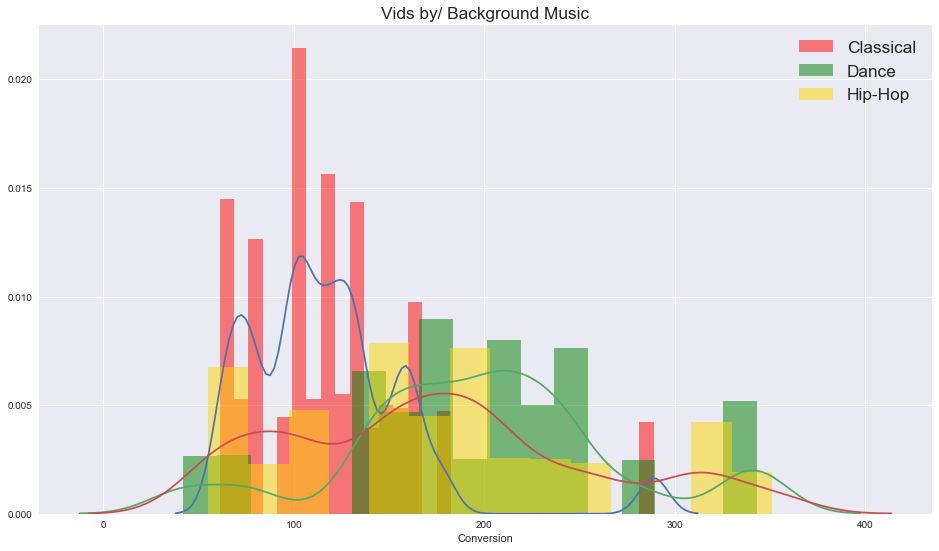

In [19]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 9))
sns.distplot(classic, hist_kws={ 'color':'red', 'alpha':0.5, 'label':'Classical'})
sns.distplot(dan, hist_kws={ 'color':'green', 'alpha':0.5, 'label':'Dance'})
sns.distplot(hip, hist_kws={ 'color':'gold', 'alpha':0.5, 'label':'Hip-Hop'})

plt.legend(fontsize='xx-large')
plt.title('Vids by/ Background Music', fontdict={'fontsize': 'xx-large'})
plt.show()

##  Analysis

Since we have have more than two samples, and the values correspond to only one feature (Back Ground Music), we will use a One-Way Anova to identify any significant differnce in conversion rate. We will make the assumption that all types of background music will have the same conversion rate as stated in the null hypothesis. We will determine if at least one type of background music has a different conversion rate, which will reject our null hypothesis.

In [34]:
f_stat,p_value = stats.f_oneway(classic,dan,hip)
print('F-stat:',f_stat)
print('p-value:',p_value)

F-stat: 380.87166771363763
p-value: 4.1081066386995276e-148


In [76]:
stats.kruskal(dan,hip,classic)

KruskalResult(statistic=727.606587888688, pvalue=1.005164036625849e-158)

* The p_value is statistically significant and shows at least one difference between background music songs' ad conversions. We have evidence to reject the null hypothesis based on the One-Way Anova parametric test and the Kruskal Wallis non-parametric test.

In [28]:
import pandas as pd
df2 = pd.DataFrame()
df2['Song'] = ['classical']*len(classic) + ['dance']*len(dan) + ['hiphop']*len(hip)
df2['Conversion'] = list(classic) + list(dan) + list(hip)
df2['Song'] = df2['Song'].astype('category')
print(df.info())
df2['Song_cat'] = df2['Song'].cat.codes
df2 = pd.get_dummies(df2)
df2['Song'] = ['classical']*len(classic) + ['dance']*len(dan) + ['hiphop']*len(hip) 
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Conversion          100 non-null int64
Video_Location      100 non-null object
Duration            100 non-null object
Button_Location     100 non-null object
Background_Color    100 non-null object
Video_Type          100 non-null object
Background_Music    100 non-null object
dtypes: int64(1), object(6)
memory usage: 5.5+ KB
None


,Conversion,Song_cat,Song_classical,Song_dance,Song_hiphop,Song
0,118,0,1,0,0,classical
1,289,0,1,0,0,classical
2,66,0,1,0,0,classical
3,67,0,1,0,0,classical
4,289,0,1,0,0,classical


In [33]:
import statsmodels.api as sm
results = sm.OLS(df2['Conversion'], 
                 sm.add_constant(df2[['Song_classical','Song_dance','Song_hiphop']])).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Conversion   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sat, 30 Nov 2019   Prob (F-statistic):          4.11e-148
Time:                        11:09:45   Log-Likelihood:                -16856.
No. Observations:                3000   AIC:                         3.372e+04
Df Residuals:                    2997   BIC:                         3.374e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            123.1443      0.913    134.835      0.000     121.353     124.935
Song_classical    -4.7373      1.749     -2.709      0.007      -8.166      -1.308
Song_dance        74.9918      1.749     42.881      0.000      71.563      78.421
Song_hiphop       52.8898      1.749     30.243      0.000      49.461      56.319
==============================================================================
Omnibus:                      111.226   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.872
Skew:                           0.429   Prob(JB):                     1.40e-29
Kurtosis:                       3.571   Cond. No.                     3.39e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* adding a constant to the categories we can see that dance has te heighest coefficient

In [45]:
import statsmodels.api as sm
results = sm.OLS(df2['Conversion'], df2['Song_cat']).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Conversion   R-squared (uncentered):                   0.620
Model:                            OLS   Adj. R-squared (uncentered):              0.620
Method:                 Least Squares   F-statistic:                              4900.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:23:32   Log-Likelihood:                         -18389.
No. Observations:                3000   AIC:                                  3.678e+04
Df Residuals:                    2999   BIC:                                  3.679e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Song_cat     110.0408      1.572     70.002      0.000     106.959     113.123
==============================================================================
Omnibus:                      109.112   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.154
Skew:                          -0.464   Prob(JB):                     5.99e-26
Kurtosis:                       2.741   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* These result tables shows a significant p_values for each song type, and suggests which song has the more influence on ad conversion, so we will perform additional tests to confirm the 

In [36]:
sm.stats.anova_lm(ols('Conversion ~ C(Song)', data=df2).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(Song),2.0,3.388694e+06,1.694347e+06,380.871668,4.108107e-148
Residual,2997.0,1.333247e+07,4.448604e+03,NaN,NaN


* We can see the song has a significant influence on ad conversion.

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(df2['Conversion'], df2['Song'])
tukey_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
classical,dance,79.729,0.001,72.7346,86.7234,True
classical,hiphop,57.627,0.001,50.6326,64.6214,True
dance,hiphop,-22.102,0.001,-29.0964,-15.1076,True


* Here we used teh tukey pairwise test to see which type of music would reject the null.

/Users/jacobtadesse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


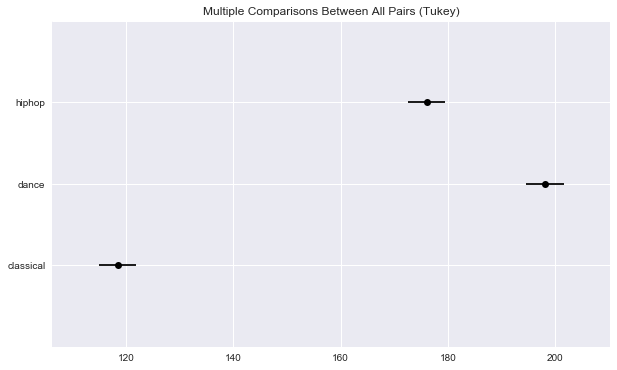

In [74]:
tukey_results.plot_simultaneous().show();

* above we can see that dance has the highest influence on conversion when compared to other music types in the Song group.

In [80]:
effect_size3 = cohens_d_two_samp(dan,classic)
print('Effect size of Dance vs classical:', effect_size3)
effect_size3, nobs3, alpha = effect_size3, dan.shape[0], 0.05
power = tt_ind_solve_power(effect_size=effect_size3, nobs1=nobs3, alpha=0.05)
print('Power of effect:',power)

Effect size of Dance vs classical: 1.3556408711652244
Power of effect: 1.0


In [71]:
effect_size4 = cohens_d_two_samp(hip,classic)
print('Effect size of Hiphop vs Classical:', effect_size4)
effect_size4, nobs4, alpha = effect_size4, hip.shape[0], 0.05
power = tt_ind_solve_power(effect_size=effect_size4, nobs1=nobs4, alpha=0.05)
print('Power of effect:',power)

Effect size of Hiphop vs Classical: 0.8912236491614998
Power of effect: 1.0


In [72]:
effect_size5 = cohens_d_two_samp(dan,hip)
print('Effect size of Dance vs Hip Hop:', effect_size5)
effect_size5, nobs5, alpha = effect_size5, dan.shape[0], 0.05
power = tt_ind_solve_power(effect_size=effect_size5, nobs1=nobs5, alpha=0.05)
print('Power of effect:',power)

Effect size of Dance vs Hip Hop: 0.2925971578234025
Power of effect: 1.0


* This shows our beta, or power, at almost 100% for Dance vs Hip Hop, Classical vs Dance and classical vs. hiphop.

## Summary

- Hypothesis Test
    * We have significant evidence to reject the null hypothesis, meaning songs have significant influence on ad conversion.
- Effect Size
    * The effect size ~ 1.13 between dance and classical which means that there is a large difference in ad conversion between the two. The effect size between hip hop and classical is about ~ .89, which is also a large difference in ad conversion between those two. With the effect size of ~.29, we see a small difference between the two. 
- Power Analysis
    * After a power analysis, we're almost 100% certain that we will fail to reject our null hypothesis when we need to.

# 4) Is the conversion rate for ads placed at the beginning, middle, or end of a video different depending on where the call-to-action button is place?

## Hypothesis test

* Aµ1...Aµk = avg conversion rate at beginning, middle and end are all equal
* Bµ1...Bµk = avg conversion rate where th call-to-action button is placed is equal in all locations

* Null Hypothesis (H<sub>0</sub>): Aµ1 = Aµ2 = Aµ3  = ...   = Aµk 

* Null Hypothesis (H<sub>0</sub>): Bµ1 = Bµ2 = Bµ3  = ...   = Bµk 

* Null Hypothesis (H<sub>0</sub>): A * B = 0, or there is no interaction between A and B

* Alternative Hypothesis (H<sub>a</sub>): At least one Aµk is different

* Alternative Hypothesis (H<sub>a</sub>): At least one Bµk is different

* Alternative Hypothesis (H<sub>a</sub>): A * B != 0, or there is some interaction between A and B

## ANONA Modeling

In [81]:
sm.stats.anova_lm(ols('Conversion ~ Video_Location*Button_Location', data=df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
Video_Location,102786.580150,2.0,16.522277,8.676633e-07
Button_Location,96569.805727,4.0,7.761485,2.217706e-05
Video_Location:Button_Location,52158.534505,8.0,2.096037,4.486467e-02
Residual,264396.344517,85.0,NaN,NaN


##  Analysis

In [82]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [83]:
tukey_results = pairwise_tukeyhsd(df['Conversion'], df['Video_Location']+df['Button_Location'])
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
beginninglower-left,beginninglower-right,82.7,0.3191,-24.0106,189.4106,False
beginninglower-left,beginningmiddle,-11.3571,0.9,-107.3685,84.6542,False
beginninglower-left,beginningupper-left,-1.5833,0.9,-85.0028,81.8362,False
beginninglower-left,beginningupper-right,86.8333,0.5405,-41.4168,215.0835,False
beginninglower-left,endlower-left,-22.6667,0.9,-123.2744,77.9411,False
beginninglower-left,endlower-right,64.5,0.9,-63.7502,192.7502,False
beginninglower-left,endmiddle,-16.1,0.9,-103.2288,71.0288,False
beginninglower-left,endupper-left,20.7,0.9,-86.0106,127.4106,False
beginninglower-left,endupper-right,22.25,0.9,-93.0106,137.5106,False
beginninglower-left,middlelower-left,9.3889,0.9,-80.1275,98.9053,False


## Visualizing Tukey Results 

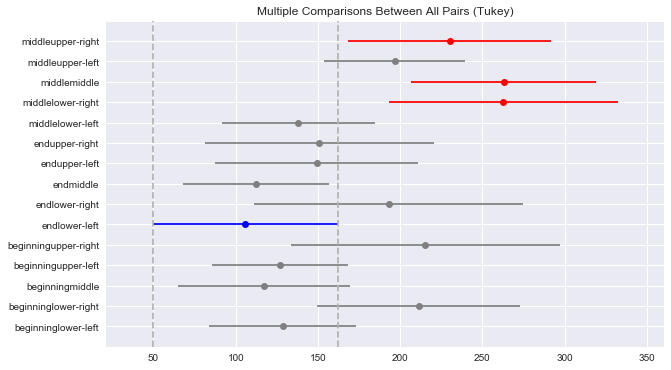

In [90]:
tukey_results.plot_simultaneous(comparison_name='endlower-left')
plt.show()

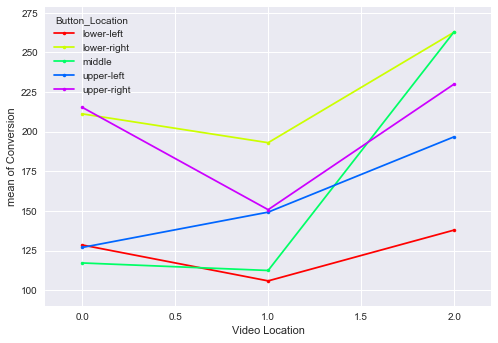

In [89]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(response=df['Conversion'], 
                 trace=df['Button_Location'],  
                 x=df['Video_Location'].astype('category').cat.codes)
plt.xlabel('Video Location')
plt.show()

## Summary

From this we can reject the first, second and third null hypotheses. There is some statistically significant differnce for the different Video_Location, as well as Button_Location. There is also some statistically significant interaction between Video_Location and Button_Location.
